In [1]:
import torch
import numpy as np
# gamma function will be needed
from scipy.special import zeta as zeta_function

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype']  = 42

%matplotlib inline

### Check conditions
---

For power-law spectra condition (91) has the form:
$$
\sum_k \lambda_k \sum_k C_{kk} > \frac{\nu - 1}{\nu} \sum_k \lambda_k^{2} \sum_k \frac{C_{kk}}{\lambda_{k}}
$$

In [82]:
def neg_mom_condition(l_k, c_k, nu: float):
  return np.sum(l_k) * np.sum(c_k) - ((nu - 1) / nu) * np.sum(l_k ** 2) * np.sum(c_k / l_k)

In [83]:
N = 1000
nus, kappas = np.linspace(1.0, 3.0, 200), np.linspace(0.0, 6.0, 200)
# make \nu \kappa grid
nu_grid, kappa_grid = np.meshgrid(nus, kappas)

In [84]:
neg_mom_conditions = np.zeros((len(nus), len(kappas)))

for i, nu in enumerate(nus):
  l_k = np.arange(1, N  + 1) ** (-nu)
  for j, kappa in enumerate(kappas):
    c_k = np.arange(1, N + 1) ** (-kappa + nu - 1)
    neg_mom_conditions[i, j] = neg_mom_condition(l_k, c_k, nu)
# clip to [-1, 1]
neg_mom_conditions = np.clip(neg_mom_conditions, a_min=-1.0, a_max=1.0)

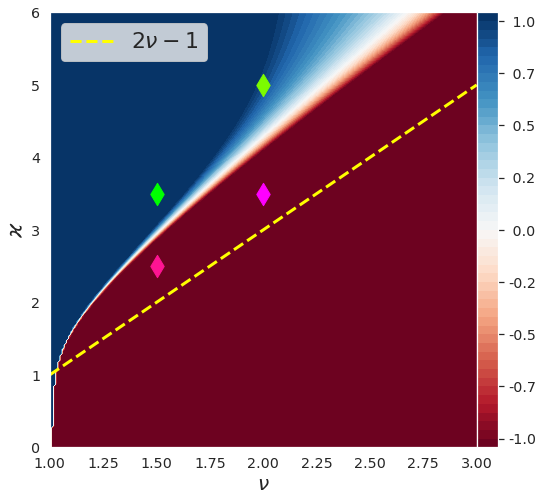

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 8))
# cond
im = ax.contourf(nu_grid, kappa_grid, neg_mom_conditions.T, cmap='RdBu', levels=50);
ax.set_xlabel(r'$\nu$', fontsize=20);
ax.set_ylabel(r'$\varkappa$', fontsize=22);
ax.plot(nus, 2 * nus -1, color='yellow', linestyle='--', linewidth=3, label=r'$2 \nu - 1$');
ax.legend(loc='upper left', fontsize=22);
# common colorbar
cbar = plt.colorbar(im, ax=ax, format='% 1.1f', pad=0.00);
# plot scatter
ax.scatter(1.5, 2.5, color='deeppink', marker='d', s=250, zorder=3);
ax.scatter(1.5, 3.5, color='lime', marker='d', s=250, zorder=3);
ax.scatter(2.0, 3.5, color='fuchsia', marker='d', s=250, zorder=3);
ax.scatter(2.0, 5.0, color='lawngreen', marker='d', s=250, zorder=3);
#
plt.savefig('plots/negative_mom_condition_analytic.pdf')

In [18]:
non_overlap_cond = (cond1 > 0).astype(int) - (cond2 > 0).astype(int)

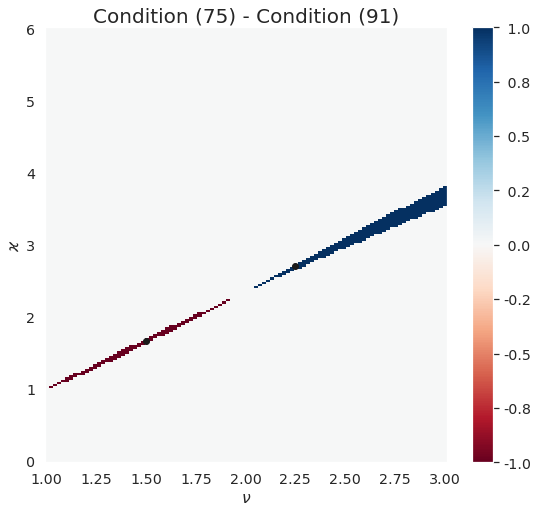

In [25]:
fig, ax = plt.subplots(figsize=(9, 8))
# cond1
im = ax.pcolormesh(nu_grid, kappa_grid, non_overlap_cond, cmap='RdBu');
ax.set_title('Condition (75) - Condition (91)', fontsize=20);
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$\varkappa$')
# 
cbar = plt.colorbar(im, ax=ax, format='% 1.1f', pad=0.05);
ax.scatter(2.25, 2.7, color='k')
ax.scatter(1.5, 1.67, color='k')

### Plot $L(\alpha)$

In [76]:
### training params
N, n_steps = 10000, 10000
batch_size = 1
### Data params
nus = [1.5, 2.0]
kappas = [4.0, 8.0]
dataset = 'synthetic'
### Mode
mode = 'spectral_diagonal'

In [77]:
loss_curves = {}
alphas = {}
betas = {}


for nu, kappa in zip(nus, kappas):
    ### root
    root_dir = f'output/{mode}/loss_optimum_alpha/synthetic/N={N}/nu={nu}/kappa={kappa}'
    # load curves
    data_path = f'{root_dir}/loss_curves.pth'
    loss_curves[(nu, kappa)] = torch.load(data_path)
    # extract betas
    alphas[(nu, kappa)] = np.unique([key[1] for key in loss_curves[(nu, kappa)].keys()])
    # extract betas
    betas[(nu, kappa)] = np.unique([key[2] for key in loss_curves[(nu, kappa)].keys()])

0.113
0.251


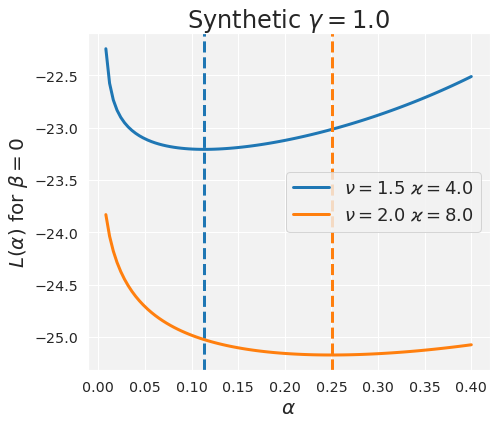

In [85]:
fig, ax = plt.subplots(figsize=(7, 6))

cmap = plt.get_cmap('tab10', 10)
for plot_id, (nu, kappa) in enumerate(zip(nus, kappas)):
    # extract alphas and betas for (nu, kappa)
    alphas_, betas_ = alphas[(nu, kappa)], betas[(nu, kappa)]
    alphas_ =  alphas_[2:]
    L_alpha = np.zeros_like(alphas_)
    for i, alpha in enumerate(alphas_):
        L_alpha[i] = loss_curves[((nu, kappa))][(batch_size, alpha, betas_[0])][-1]
    L_alpha = np.nan_to_num(L_alpha, nan=1e20)
    L_alpha = np.clip(L_alpha, a_min=0.0, a_max=1.0)
    ax.plot(
        alphas_, 
        np.log(L_alpha), 
        label=rf'$\nu=${nu:.1f} $\varkappa=${kappa:.1f}', 
        color=cmap(plot_id), 
        linewidth=3
    );
    ind_min = alphas_[np.argmin(L_alpha)]
    alpha_opt = 
    print(alpha_opt)
    ax.axvline(alpha_opt, color=cmap(plot_id), linestyle='--', linewidth=3);
    
ax.legend(loc='center right', fontsize=18)
ax.set_xlabel(r'$\alpha$', fontsize=20);
ax.set_ylabel(r'$L(\alpha)$ for $\beta=0$', fontsize=20);
ax.set_title(rf'Synthetic $\gamma=${gamma:.1f}', fontsize=24);

plt.tight_layout()
# savefig
# plt.savefig(f'plots/synthetic/negative_momenta_benefit.pdf')

### Plot $L(\beta)$

In [95]:
### training params
N, n_steps = 10000, 10000
batch_size = 1
### Data params
nus = [1.5, 1.5, 2.0, 2.0]
kappas = [2.5, 3.5, 3.0, 5.0]
dataset = 'synthetic'
### Mode
mode = 'spectral_diagonal'

In [96]:
gamma = 1.0

In [97]:
loss_curves = {}
alphas = {}
betas = {}

for nu, kappa in zip(nus, kappas):
    ### root
    root_dir = f'output/{mode}/loss_optimum_beta/synthetic/N={N}/nu={nu}/kappa={kappa}'
    # load curves
    data_path = f'{root_dir}/loss_curves.pth'
    loss_curves[(nu, kappa)] = torch.load(data_path)
    # extract betas
    alphas[(nu, kappa)] = np.unique([key[1] for key in loss_curves[(nu, kappa)].keys()])
    # extract betas
    betas[(nu, kappa)] = np.unique([key[2] for key in loss_curves[(nu, kappa)].keys()])

In [98]:
# loss_curves[(2.0, 3.5)][()]

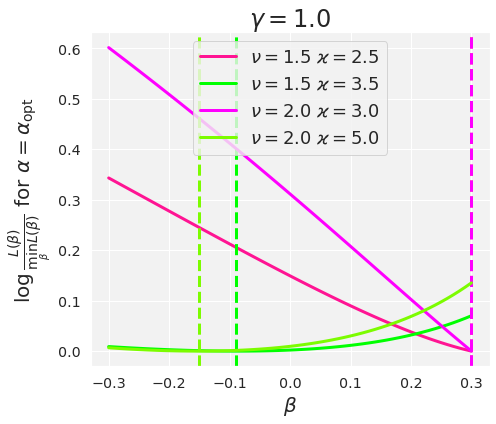

In [99]:
fig, ax = plt.subplots(figsize=(7, 6))

# cmap = plt.get_cmap('tab10', 10)
colors = ['deeppink', 'lime', 'fuchsia', 'lawngreen']
for plot_id, (nu, kappa) in enumerate(zip(nus, kappas)):
    # extract alphas and betas for (nu, kappa)
    alphas_, betas_ = alphas[(nu, kappa)], betas[(nu, kappa)]
    L_beta = np.zeros_like(betas_)
    for i, beta in enumerate(betas_):
        L_beta[i] = loss_curves[((nu, kappa))][(batch_size, alphas_[0], beta)][-1]
    L_beta = np.nan_to_num(L_beta, nan=1e20)
    L_beta = np.clip(L_beta, a_min=0.0, a_max=1.0)
    ax.plot(
        betas_, 
        np.log(L_beta / L_beta.min()), 
        label=rf'$\nu=${nu:.1f} $\varkappa=${kappa:.1f}',  
        color=colors[plot_id], 
        linewidth=3
    );
    beta_opt = betas_[np.argmin(L_beta)]
    ax.axvline(beta_opt, color=colors[plot_id], linestyle='--', linewidth=3);
    
ax.legend(loc='upper center', fontsize=18)
ax.set_xlabel(r'$\beta$', fontsize=20);
ax.set_ylabel(r'$\log \frac{L(\beta)}{\min_\beta L(\beta)}$ for $\alpha=\alpha_{\mathrm{opt}}$', fontsize=20);
ax.set_title(rf'$\gamma=${gamma:.1f}', fontsize=24);

plt.tight_layout()
# savefig
# plt.savefig(f'plots/synthetic/negative_momenta_benefit_different_nu.pdf')

### Compate original and clamped spectrum
---

In [4]:
### training params
N, n_steps = 10000, 10000
batch_size = 1
### Data params
nus = [1.5, 1.5]
kappas = [3.0, 4.0]
kappa_clamp = 5
dataset = 'synthetic'
### Mode
mode = 'spectral_diagonal'

In [5]:
gamma = 1.0

In [10]:
# orig and clamped specturm
loss_curves_or, loss_curves_cl = {}, {}
alphas_or, betas_or = {}, {}
alphas_cl, betas_cl = {}, {}

for nu, kappa in zip(nus, kappas):
    ### root
    root_dir = f'output/{mode}/loss_optimum_beta/synthetic/N={N}/nu={nu}/kappa={kappa}'
    # load curves with true power-law spectrum
    data_path = f'{root_dir}/loss_curves.pth'
    loss_curves_or[(nu, kappa)] = torch.load(data_path)
    # load curves with distorted spectrum
    data_path = f'{root_dir}/kappa_clamp={kappa_clamp}/loss_curves.pth'
    loss_curves_cl[(nu, kappa)] = torch.load(data_path)
    # extract alphas
    alphas_or[(nu, kappa)] = np.unique([key[1] for key in loss_curves_or[(nu, kappa)].keys()])
    alphas_cl[(nu, kappa)] = np.unique([key[1] for key in loss_curves_cl[(nu, kappa)].keys()])
    # extract betas
    betas_or[(nu, kappa)]  = np.unique([key[2] for key in loss_curves_or[(nu, kappa)].keys()])
    betas_cl[(nu, kappa)]  = np.unique([key[2] for key in loss_curves_cl[(nu, kappa)].keys()])

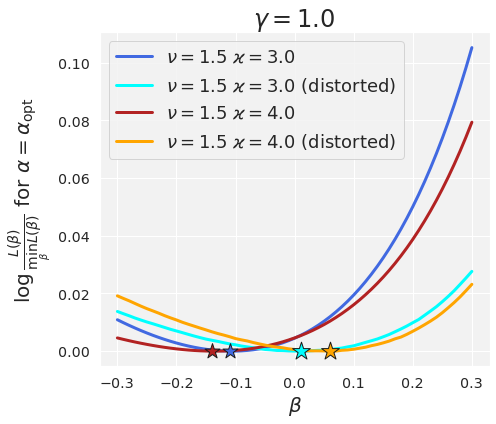

In [33]:
fig, ax = plt.subplots(figsize=(7, 6))

colors_or = ['royalblue', 'firebrick']
colors_cl = ['cyan', 'orange']


for plot_id, (nu, kappa) in enumerate(zip(nus, kappas)):
    # extract alphas and betas for (nu, kappa)
    alphas_, betas_ = alphas_or[(nu, kappa)], betas_or[(nu, kappa)]
    L_beta = np.zeros_like(betas_)
    # plot original curve
    for i, beta in enumerate(betas_):
        L_beta[i] = loss_curves_or[((nu, kappa))][(batch_size, alphas_[0], beta)][-1]
    L_beta = np.nan_to_num(L_beta, nan=1e20)
    L_beta = np.clip(L_beta, a_min=0.0, a_max=1.0)
    ax.plot(
        betas_, 
        np.log(L_beta / L_beta.min()), 
        label=rf'$\nu=${nu:.1f} $\varkappa=${kappa:.1f}', 
        color=colors_or[plot_id], 
        linewidth=3
    );
    ind_opt = np.argmin(L_beta)
    ax.scatter(
        betas_[ind_opt], 
        L_beta[ind_opt], 
        color=colors_or[plot_id],
        marker='*', 
        edgecolor='k',
        s=250,
        zorder=3
    );
    
    ### plot distorted curve ###
    
    alphas_, betas_ = alphas_cl[(nu, kappa)], betas_cl[(nu, kappa)]
    for i, beta in enumerate(betas_):
        L_beta[i] = loss_curves_cl[((nu, kappa))][(batch_size, alphas_[0], beta)][-1]
    L_beta = np.nan_to_num(L_beta, nan=1e20)
    L_beta = np.clip(L_beta, a_min=0.0, a_max=1.0)
    ax.plot(
        betas_, 
        np.log(L_beta / L_beta.min()), 
        label=rf'$\nu=${nu:.1f} $\varkappa=${kappa:.1f} (distorted)', 
        color=colors_cl[plot_id],
        linewidth=3
    );
    ind_opt = np.argmin(L_beta)
    ax.scatter(
        betas_[ind_opt], 
        L_beta[ind_opt], 
        color=colors_cl[plot_id],
        marker='*', 
        edgecolor='k',
        s=350,
        zorder=3
    );
    
    
ax.legend(loc='upper left', fontsize=18)
ax.set_xlabel(r'$\beta$', fontsize=20);
ax.set_ylabel(r'$\log \frac{L(\beta)}{\min_\beta L(\beta)}$ for $\alpha=\alpha_{\mathrm{opt}}$', fontsize=20);
ax.set_title(rf'$\gamma=${gamma:.1f}', fontsize=24);

plt.tight_layout()
# savefig
plt.savefig(f'plots/synthetic/negative_momenta_benefit_distortion.pdf')